# Pretrained Models - Kunskapskontroll

**Obligatoriskt att fylla i uppgifterna nedan.**

Namn: Shriya Walia

Vem du har presenterat för: Daniel Hemgren, Lidia

Datum då du presenterade: 8-5-2024

**Kunskapskontrollen lämnas in på Omniway.**

**It is possible to load pretrained models which is a powerful concept.**

Model implementation: 
https://keras.io/api/applications/#usage-examples-for-image-classification-models

Class list for ResNet50, for example tennis ball is 852:
https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

Ladda den förtränade ResNet50-modellen med vikter tränade på ImageNet-dataset

In [2]:
model = ResNet50(weights='imagenet')

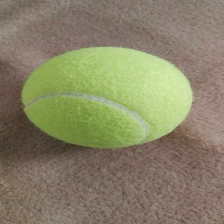

In [3]:
# img_path = 'zebra.jpg'
# img_path = 'linjal.jpg'
img_path = 'tennisboll.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img

In [4]:
x = image.img_to_array(img)
x.shape

(224, 224, 3)

In [5]:
x = np.expand_dims(x, axis=0)
x.shape

(1, 224, 224, 3)

In [6]:
# https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/preprocess_input
x = preprocess_input(x)

In [7]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted: [('n04409515', 'tennis_ball', 0.9999969), ('n04039381', 'racket', 2.7498354e-06), ('n03942813', 'ping-pong_ball', 5.5182866e-08)]


# 1. Take some pictures yourself and predict their class.

Predicting a bowtie

Beskriva väg till input image:

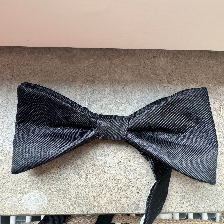

In [8]:
img_path_1 = 'bowtie.jpg'
#img_path_1 = 'cardigan.jpg'
#img_path_1 = 'desktop.jpg'
#img_path_1 = 'polaroidcamera.jpg'
img_1 = image.load_img(img_path_1, target_size=(224, 224))
img_1

Convert the image to a NumPy array:

In [9]:
x1 = image.img_to_array(img_1)
x1.shape

(224, 224, 3)

Lägger till en extra dimension till arrayen för att skapa en batch av storlek 1, eftersom ResNet50 förväntar sig input bilder i batchformat:

In [10]:
x1 = np.expand_dims(x1, axis=0)
x1.shape

(1, 224, 224, 3)

Preprocess bilden enligt kraven för ResNet50-modellen:

In [11]:
x1 = preprocess_input(x1)

In [12]:
preds_1 = model.predict(x1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Decodes the predicted probabilities into human-readable labels. Den tar de predikterade sannolikheterna (preds) och returnerar en lista med tupler, som var och en innehåller klass-ID, klassbeskrivning och sannolikhet.
'Top=3': Returnera de tre bästa prediktioner med de högsta sannolikheterna.

In [13]:
print('Predicted:', decode_predictions(preds_1, top=3)[0])

Predicted: [('n02883205', 'bow_tie', 0.9999546), ('n04591157', 'Windsor_tie', 2.4145394e-05), ('n03045698', 'cloak', 8.238491e-06)]


# 2. Answer the question: Why is "Pretrained models" a very powerful concept?

1. Att ladda förtränade modeller som har tränats mycket på stora datamängder är ett kraftfullt koncept eftersom det eliminerar behovet av att genomgå hela trainingsprocessen, vilket sparar mycket tid.
2. Förtränade modeller erbjuder fördelen med 'transfer learning', vilket gör det möjligt för användare att 'fine tune' dem för specifika uppgifter eller dataset. Genom att anpassa förtränade modeller till sina egna data kan användare uppnå hög prestanda med minimal ansträngning.
3. Förtränade modeller är lättillgängliga som 'open source libraries', vilket gör dem lättillgängliga.